<a href="https://colab.research.google.com/github/Elijah-4/PyTorch-Study/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of flower)
  # -- > Hidden layer1 (number of neurons)
  # --> h2 (n)
  # --> output (3 classes of flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:

# pick random seed
torch.manual_seed(41)
# create an instance of our model
model = Model()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


In [6]:
my_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [7]:
# change last column from strings to integers

my_df['species'] = my_df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})
my_df.head()


/tmp/ipython-input-609181.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})


sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2      0.0
1           4.9          3.0           1.4          0.2      0.0
2           4.7          3.2           1.3          0.2      0.0
3           4.6          3.1           1.5          0.2      0.0
4           5.0          3.6           1.4          0.2      0.0

In [8]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [9]:
# convert to numpy arrays
X = X.values
y = y.values

In [10]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure error, how far off predictions are from data
criterion = nn.CrossEntropyLoss()
# Choose Optimizer (Adam), lr = learning rate (if error doesn't go down after iterations, we want to lower our lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# Train our model
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # go foward and get a prediction
  y_pred = model.forward(X_train) # get predicted resultes

  # measure loss/error, high at first
  loss = criterion(y_pred, y_train) # predicted values v the y_train

  # Keep track of losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # do some back propogation: take error rate and
  # feed back thru network to fine tune weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.2676880657672882
Epoch: 60 Loss: 0.17942363023757935
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118418931961
Epoch: 90 Loss: 0.06520850956439972


Text(0.5, 0, 'epoch')

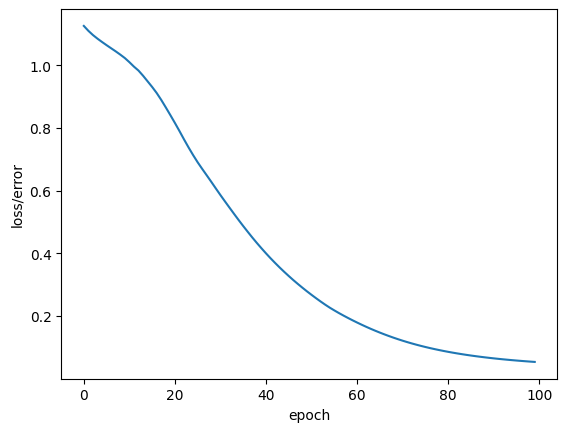

In [16]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')


In [17]:
# Evaluate Model on Test Data Set

with torch.no_grad(): # turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # find loss

In [18]:
loss

tensor(0.1315)

In [22]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 2 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 2 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 2 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 1 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 2 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 1 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 2 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 1 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 2 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 2 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 2 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 0 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 0 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 1 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 0 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 2 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 0 	 0
18.) tensor([-5.8075,  4.6053,  6.2458]) 	 1 	 2
19.) tensor([ 4.4343, -2.1392, -2.8242]) 	 0 	 0
20.) tensor([ 3.4527, -1.2514, -2.3660]) 	 0 	 0
21.) tensor([-2.6189,  4.5619

In [23]:
new_iris = torch.tensor([4.7, 1.2, 1.3, 0.2])

In [24]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 2.5077, -0.3517, -1.8724])


In [25]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [26]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-5.9944,  4.5077,  6.6792])


In [27]:
# save our nn model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')

In [29]:
# load saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<All keys matched successfully>

In [30]:
# make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)